<a href="https://colab.research.google.com/github/Juan-jdq/Diseno-y-analisis-de-algoritmos-cuanticos/blob/main/CodigoSinCap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=cd10f466593d2e2beea496f23278f9a3fd782b9d6b22dbf81013ce113ad197a7
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


     ┌───┐                ┌─┐      
q_0: ┤ H ├──■────■───■────┤M├──────
     ├───┤  │    │   │ ┌─┐└╥┘      
q_1: ┤ X ├──┼────■───┼─┤M├─╫───────
     ├───┤┌─┴─┐  │   │ └╥┘ ║ ┌─┐   
q_2: ┤ X ├┤ X ├──┼───X──╫──╫─┤M├───
     └───┘└───┘┌─┴─┐ │  ║  ║ └╥┘┌─┐
q_3: ──────────┤ X ├─X──╫──╫──╫─┤M├
               └───┘    ║  ║  ║ └╥┘
c: 4/═══════════════════╩══╩══╩══╩═
                        1  0  2  3 
{'0110': 5007, '0111': 4993}


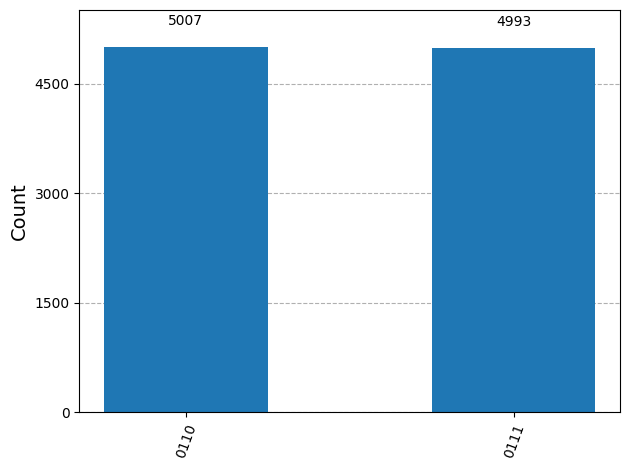

In [2]:
import qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Creamos un circuito de 4 qubits y 4 bits clasicos
qc = QuantumCircuit(4, 4)

# 1) Hadamard en q0
qc.h(0)

# 2) NOT (X) en q1 y q2
qc.x(1)
qc.x(2)

# 3) CNOT sobre q2, con control q0
qc.cx(0, 2)

# 4) Toffoli (CCX) sobre q3, con controles q0,q1
qc.ccx(0, 1, 3)

# 5) Fredkin (CSWAP) entre q2 y q3, con control q0
qc.cswap(0, 2, 3)

# 6) Medida de todos los qubits
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Mostrar el circuito
print(qc.draw())

import qiskit.providers.basic_provider

provider = qiskit.providers.basic_provider.BasicProvider()
backend = provider.get_backend()
qct2 = qiskit.transpile(qc, backend)
job = backend.run(qct2, shots=10000)
result = job.result()
counts = result.get_counts()
print(counts)
histograma = qiskit.visualization.plot_histogram(counts)
histograma

In [ ]:
!pip install qiskit
!pip install qiskit[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=dcabbdbb307cd2dfc187b16aa720202da788ed5043af774ab58870ea0efc100a
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


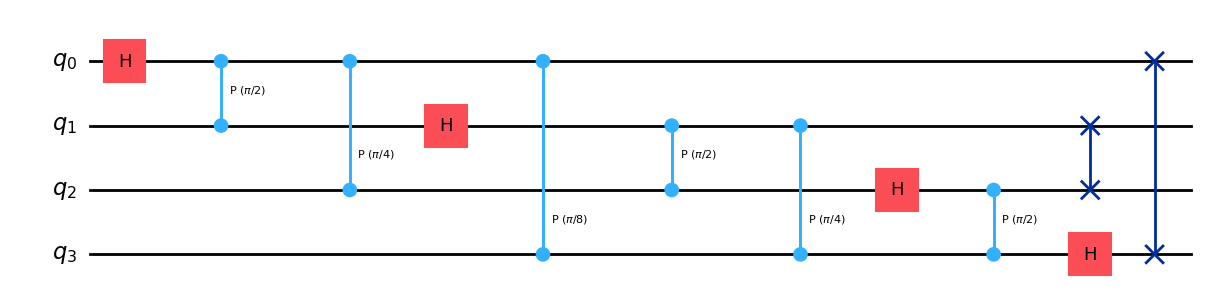

In [ ]:


from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import numpy as np
from matplotlib import pyplot as plt
def custom_qft_circuit(n_qubits):
    qc = QuantumCircuit(n_qubits)

    for qubit in range(n_qubits):
        # Aplicar puerta Hadamard al qubit actual
        qc.h(qubit)

        # Aplicar puertas de fase controladas (R_k)
        for control_qubit in range(qubit+1, n_qubits):
            k = control_qubit - qubit + 1
            angle = 2*np.pi/(2**k)
            qc.cp(angle, control_qubit, qubit)

    # Añadir swaps para corregir el orden de los qubits
    for qubit in range(n_qubits//2):
        qc.swap(qubit, n_qubits-qubit-1)

    return qc

# Configurar visualización más grande
plt.rcParams['figure.figsize'] = (10, 6)

# Ejemplo para 4 qubits
n = 4
qft_circuit = custom_qft_circuit(n)

# Dibujar el circuito
display(qft_circuit.draw('mpl', style='iqp'))






In [ ]:
!pip install qiskit-aer
!pip install qiskit
!pip install qiskit[visualization]

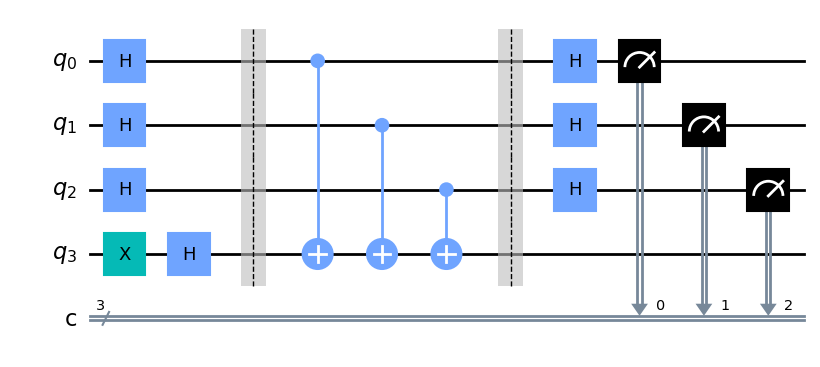

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

# Configuración para n=3 qubits (ejemplo)
n = 3

# Crear circuito
qc = QuantumCircuit(n+1, n)  # n+1 qubits, n bits clásicos

# Paso 1: Preparación
qc.x(n)  # Inicializar auxiliar en |1⟩
qc.h(range(n+1))  # Hadamard a todos

# Paso 2: Oráculo (f(x) = x0 XOR x1)
qc.barrier()
qc.cx(0, n)  # CNOT qubit 0 → aux
qc.cx(1, n)  # CNOT qubit 1 → aux
qc.cx(2, n)
qc.barrier()

# Paso 3: Interferencia
qc.h(range(n))  # Hadamard solo a entradas

# Paso 4: Medida
qc.measure(range(n), range(n))

# Dibujar circuito
display(qc.draw('mpl', style='clifford'))
plt.show()

# Simulación (cambio importante aquí)
simulator = AerSimulator()  # Usar AerSimulator directamente
result = simulator.run(qc, shots=1024).result()
plot_histogram(result.get_counts())
plt.show()

